<a href="https://colab.research.google.com/github/cesar97af/2024-2-Programacion/blob/master/Otro_de_PyTorch_(Versi%C3%B3n_1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch

Pytorch es una libreria de código abierto desarrollado por "Facebook's AI Research lab" (FAIR) y es particularmente conocida por su flexibilidad y eficiencia en el desarrollo de modelos de deep learning (aprendizaje profundo).

Según la [página web oficial](https://pytorch.org/), este también es un proyecto de The Linux Foundation. Esta se basa en el uso de los tensores (arrays de NumPy) y son utilizados para representar información numérica multidimensional, la cual permite realizar operaciones matemáticas de forma eficiente, usando otros recursos para sus calculos. Con esto se pueden crear redes neuronales, ya que los datos de entrada, las salidas y los parámetros realizados pueden ser representados con dichos arrays.

Como se instala. Por lo general, la libreria se instala usando el comando

```
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
```
Pero, en caso de usar un servidor como centro de ejecución, se deberá instalar de la siguiente manera:


```
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata #desinstalamos la versión de torch si se encuentra presente
!pip3 install torch torchaudio torchvision torchtext torchdata #Instalamos Torch
```




In [ ]:
#from google.colab import drive # Esto para cargar o guardar las bases de datos si lo requerimos
#drive.mount('/content/gdrive')

A continuación vamos a importar las librerias requeridas para explicar con ejemplos los módulos más importantes.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import os

Primero: **Que es un tensor?**:  Un tensor son estructuras de datos similares a las matrices y los vectores (arrays), se utilizan para códificar las entradas y salidas de un módelo, así como los parámetros del mismo. Los tensores según la página de documentación "*son similares a los ndarrays de NumPy, excepto que los tensores pueden ejecutarse en GPU u otros aceleradores de hardware*", esto los hace más eficientes debido a que elimina una gran parte de la carga en la memoria.

In [ ]:
#Un ejemplo
tensorsito = torch.rand(3,4)
print(tensorsito)

tensor([[0.0160, 0.2024, 0.9134, 0.1565],
        [0.8456, 0.0867, 0.3752, 0.1682],
        [0.6648, 0.0271, 0.0343, 0.0266]])


In [ ]:
#Otro Ejemplo
datp = [[1,4],[2,5],[3,6]]
x_datp = torch.tensor(datp)
print(x_datp)

tensor([[1, 4],
        [2, 5],
        [3, 6]])


Por otro lado: se tiene la función **Autograd** la cual permite calcular las derivadas de manera automática para el entrenamiento de modelos. Esta característica es clave en las redes neuronales para realizar la retropropagación (backpropagation) y ajustar los pesos del modelo

In [ ]:
# Ejemplo_3: Crear un tensor que necesita gradientes
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2
y.backward()  # Calcula la derivada de y con respecto a x
print(x.grad)  # Muestra el gradiente

tensor([4.])


También vamos a considerar la importancia del **Módulo `torch.nn` (Es para Redes Neuronales)**: Es un módulo es esencial para construir redes neuronales. Contiene clases y funciones para definir capas, redes completas, y gestionar el flujo de datos entre las capas. Algunas clases comunes son:

   - `torch.nn.Linear`: Para capas completamente conectadas.
   - `torch.nn.Conv2d`: Para capas de convolución.
   - `torch.nn.ReLU`: Función de activación ReLU.
   - `torch.nn.CrossEntropyLoss`: Función de pérdida para clasificación.

In [ ]:
import torch.nn as nn

# Definición de la red neuronal
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(3, 1)  # Capa lineal de 3 a 1

  def forward(self, x):
    return self.fc1(x)

# Instanciamos el modelo
model = SimpleNN()

# Entrada de ejemplo
input_tensor = torch.tensor([[1.0, 2.0, 3.0]])

# Realizamos una pasada hacia adelante (forward pass)
output = model(input_tensor)
print(output)

tensor([[0.0487]], grad_fn=<AddmmBackward0>)


**Optimizadores (`torch.optim`)** : Para entrenar las redes neuronales, necesitas un optimizador que actualice los pesos de la red en función de los gradientes calculados. PyTorch proporciona varios optimizadores como:
   - `torch.optim.SGD` (Descenso de gradiente estocástico)
   - `torch.optim.Adam` (Método de optimización más avanzado)

In [ ]:
import torch.optim as optim

# Creamos el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Usamos el optimizador en el entrenamiento
optimizer.zero_grad()  # Resetear los gradientes
output = model(input_tensor)
loss = (output - 1) ** 2  # Ejemplo de pérdida
loss.backward()  # Calcular los gradientes
optimizer.step()  # Actualizar los pesos

PyTorch se utiliza en física computacional de diversas maneras. Una de las formas más destacadas es su aplicación en **modelos predictivos y simulaciones** basadas en redes neuronales. Algunas aplicaciones frecuentes son:

1. **Interacción con datos experimentales**: En la física experimental, los datos de sensores, imágenes de microscopía, y señales de partículas pueden ser procesados y analizados usando redes neuronales para detectar patrones, clasificar eventos o incluso hacer inferencias sobre propiedades físicas de los materiales.

2. **Simulación de sistemas físicos**: Las redes neuronales pueden modelar y predecir el comportamiento de sistemas físicos complejos que involucran grandes cantidades de datos o ecuaciones difíciles de resolver, como las simulaciones de fluidos, la dinámica molecular, o la física de partículas.

3. **Modelos de campos cuánticos y física estadística**: Los métodos de aprendizaje profundo, (se incluyen a los autoencoders o las redes neuronales convolucionales), se pueden aplicar para resolver problemas en física teórica, como la predicción de la distribución de energía o la interacción de partículas, utilizando datos de simulaciones previas. (se puede hacer uso de otra libreria dedicada llamada QuTiP)

𝞱 - (Bueno tambien funciona para otras como TensorFlow y Scikit-learn)


# Ejemplo

A partir de aquí ya hablamos de usar lo anterior  

In [ ]:
# Descarga de la base de datos desde un repositorio libre.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Descargar el datasets de entrenamiento.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.69MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 135kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.52MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
batch_size = 64

# Crear cargadores de la Data.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Forma de X [N, C, H, W]: {X.shape}")
    print(f"Forma de y: {y.shape} {y.dtype}")
    break

Forma de X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Forma de y: torch.Size([64]) torch.int64


In [ ]:
# Obteniendo los dispositivo CPU, MPS o GPU  para entrenamiento de la Data.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Usando {device} dispositivo")

# Creando la Red Neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x): #Flujo de operaciones entre las capas
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Usando cpu dispositivo
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss() #Función de perdida [CrossEntropyLoss = Función de entropia cruzada]
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #Función de Optimización [lr = taza de aprendizaje]

In [ ]:
# Listas para almacenar el histórico de entrenamiento
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

In [ ]:
# Función de entrenamiento
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    running_loss = 0.0
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Calcula el error de predicción
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation o retropropagación
        loss.backward() # Calculando las gradientes para ajustar el modelo
        optimizer.step() # Usar las gradientes para cambiar los pesos de la red neuronal
        optimizer.zero_grad() #todo se queda en cero para la siguiente iteración

        running_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / size
    return avg_loss, accuracy

In [ ]:
# Función de prueba
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) # Tamaño total del conj. de datos de prueba
    num_batches = len(dataloader) #Número de lotes procesados durante la evaluación
    model.eval()
    test_loss, correct = 0, 0 # Inicializa las variables para acumular la pérdida total y la cantidad de predicciones correctas.
    with torch.no_grad(): # Desactiva el cáculo de los gradientes (ahorro de memoria)
        for X, y in dataloader:
            X, y = X.to(device), y.to(device) # Mueve las entradas y etiquetas a la misma unidad de proc. (la CPU) que el modelo, usando device
            pred = model(X)
            test_loss += loss_fn(pred, y).item() #Calcula la perdida entre las predicciones y etiquetas verd.  item convierte tensor a un valor escalar
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #*
    test_loss /= num_batches # divide pérdida total por el número de lotes
    correct /= size # Divide el número de pred. correctas por el tamaño total del conj. de datos
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n") #Accuracy =  precisión (en porcentaje) con un solo decimal; Avg loss = pérdida promedio con 8 decimales.
    return test_loss, correct # Regresando los valores calculados

* ↦ Nota aparte

`(pred.argmax(1) == y).type(torch.float).sum().item():`
pred.argmax(1) obtiene la clase predicha, que es el índice del valor más alto en la predicción a lo largo de la dimensión 1 (en clasificación, esta es la clase con la mayor probabilidad). Luego compara si la clase predicha es igual a la etiqueta verdadera y (`==y`).

`.type(torch.float)` convierte el resultado booleano (True o False) en un número flotante (1.0 o 0.0).
  .sum().item() suma todos los valores correctos y devuelve el total como un valor escalar.

In [ ]:
# Entrenamiento y evaluación
epochs = 5 # Ciclos o Epocas
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_accuracy = test(test_dataloader, model, loss_fn)

    # Almacenar el historial de entrenamiento
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

print("Hecho!")

Epoch 1
-------------------------------
loss: 2.152947  [   64/60000]
loss: 2.149454  [ 6464/60000]
loss: 2.097814  [12864/60000]
loss: 2.114582  [19264/60000]
loss: 2.073098  [25664/60000]
loss: 1.997886  [32064/60000]
loss: 2.029238  [38464/60000]
loss: 1.948624  [44864/60000]
loss: 1.945205  [51264/60000]
loss: 1.886989  [57664/60000]
Test Error: 
 Accuracy: 60.0%, Avg loss: 1.882154 

Train Loss: 2.0285, Train Accuracy: 55.53%
Test Loss: 1.8822, Test Accuracy: 0.60%
Epoch 2
-------------------------------
loss: 1.908435  [   64/60000]
loss: 1.886243  [ 6464/60000]
loss: 1.776739  [12864/60000]
loss: 1.815511  [19264/60000]
loss: 1.718372  [25664/60000]
loss: 1.652104  [32064/60000]
loss: 1.676944  [38464/60000]
loss: 1.573790  [44864/60000]
loss: 1.589440  [51264/60000]
loss: 1.499233  [57664/60000]
Test Error: 
 Accuracy: 61.9%, Avg loss: 1.512726 

Train Loss: 1.6922, Train Accuracy: 62.24%
Test Loss: 1.5127, Test Accuracy: 0.62%
Epoch 3
-------------------------------
loss: 1.57

In [ ]:
# Guardar el modelo entrenado
torch.save(model.state_dict(), "model.pth")
print("Modelo guardado en 'model.pth'")

Modelo guardado en 'model.pth'


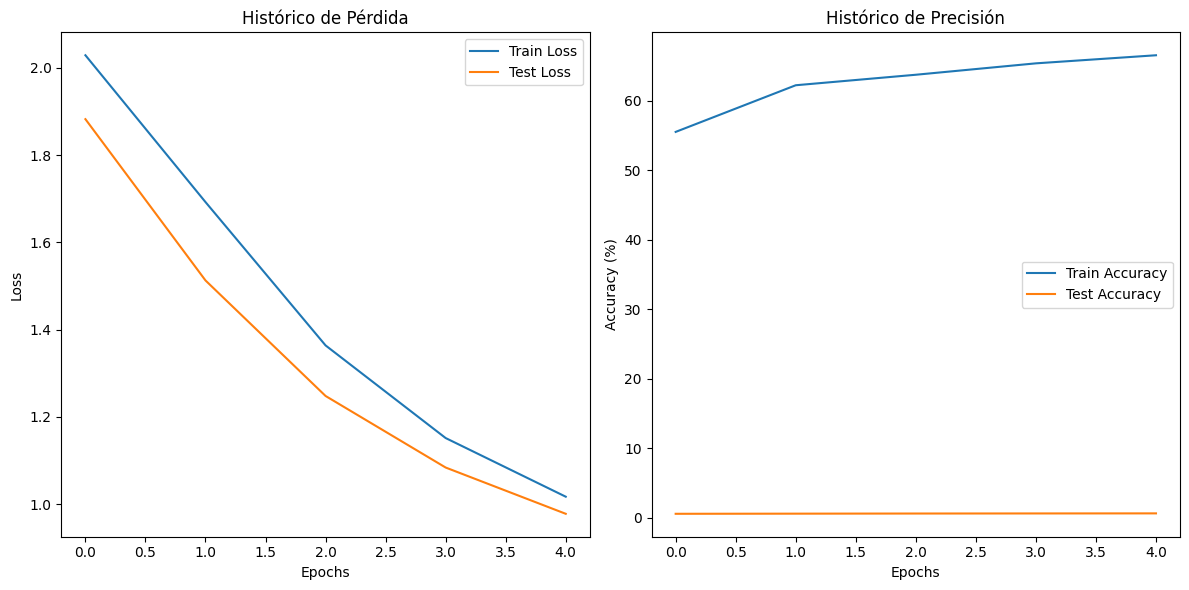

In [ ]:
# Pérdida de entrenamiento y prueba
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Histórico de Pérdida')

# Precisión de entrenamiento y prueba
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Histórico de Precisión')

plt.tight_layout()
plt.show()

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))
# Cargar el modelo guardado
#model = NeuralNetwork().to(device)
#model.load_state_dict(torch.load("model.pth", map_location=device))

<All keys matched successfully>

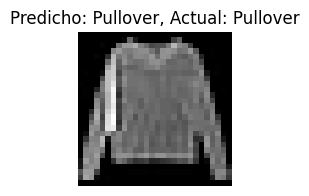

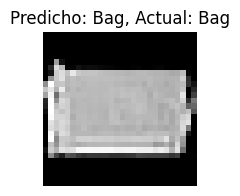

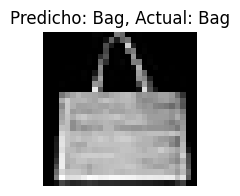

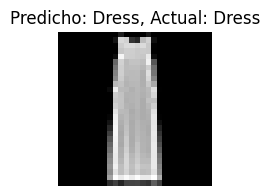

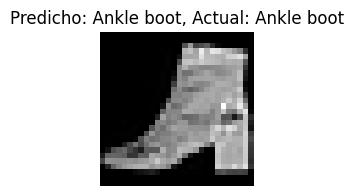

Predicciones aleatorias realizadas.


In [ ]:
# Realizar predicciones aleatorias
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
    "Sneaker", "Bag", "Ankle boot"
]

model.eval()
for _ in range(5):
    # Escoger una imagen aleatoria del dataset de prueba
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]

    # Realizar la predicción
    with torch.no_grad():
        img = img.unsqueeze(0).to(device)  # Agregar batch dimension
        pred = model(img)
        predicted_class = classes[pred.argmax(1).item()]
        actual_class = classes[label]

    # Mostrar imagen y resultados
    plt.figure(figsize=(2, 2))
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Predicho: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()

print("Predicciones aleatorias realizadas.")

# Descargar el datasets de entrenamiento.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicho: "{predicted}", Actual: "{actual}"')

Predicho: "Ankle boot", Actual: "Ankle boot"


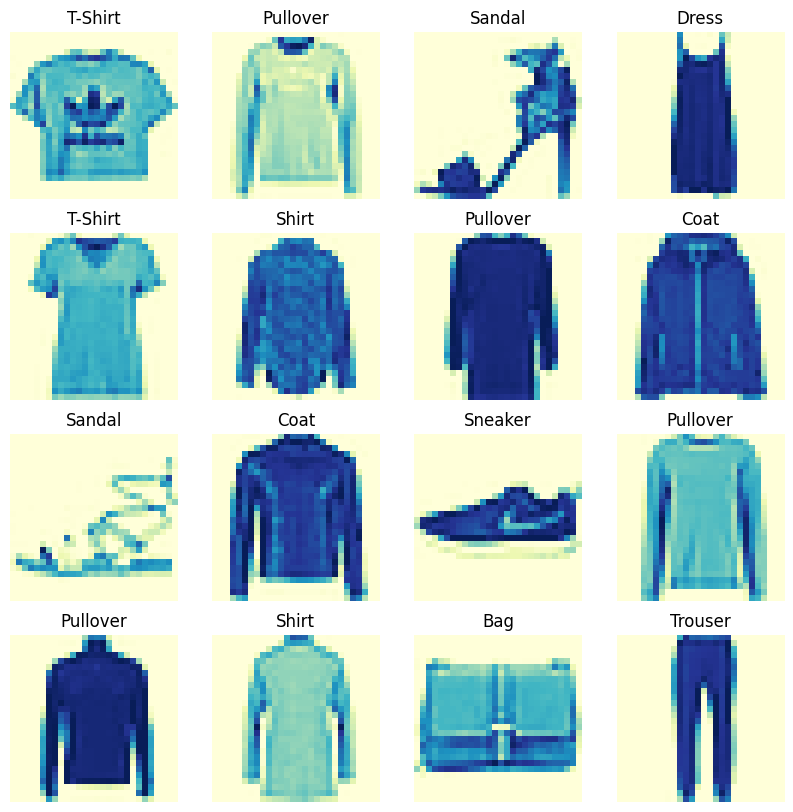

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="YlGnBu")
plt.show()